In [2]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt




In [3]:
# 2. Load and preprocess dataset (CIFAR-10)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to 1D array
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [4]:
# 3. Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [5]:

# 4. Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

# 5. Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [7]:
# 6. Train model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))




Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3552 - loss: 1.7546 - val_accuracy: 0.5628 - val_loss: 1.2303
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.5718 - loss: 1.2046 - val_accuracy: 0.6250 - val_loss: 1.0592
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.6342 - loss: 1.0381 - val_accuracy: 0.6527 - val_loss: 1.0018
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6708 - loss: 0.9363 - val_accuracy: 0.6729 - val_loss: 0.9311
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7021 - loss: 0.8509 - val_accuracy: 0.6731 - val_loss: 0.9299
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7194 - loss: 0.8025 - val_accuracy: 0.7005 - val_loss: 0.8682
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 46ms/step - accuracy: 0.7428 - loss: 0.7355 - val_accuracy: 0.6937 - val_loss: 0.8878
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7606 -

In [8]:
# 7. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

313/313 - 3s - 11ms/step - accuracy: 0.7021 - loss: 0.8930

Test Accuracy: 70.21%


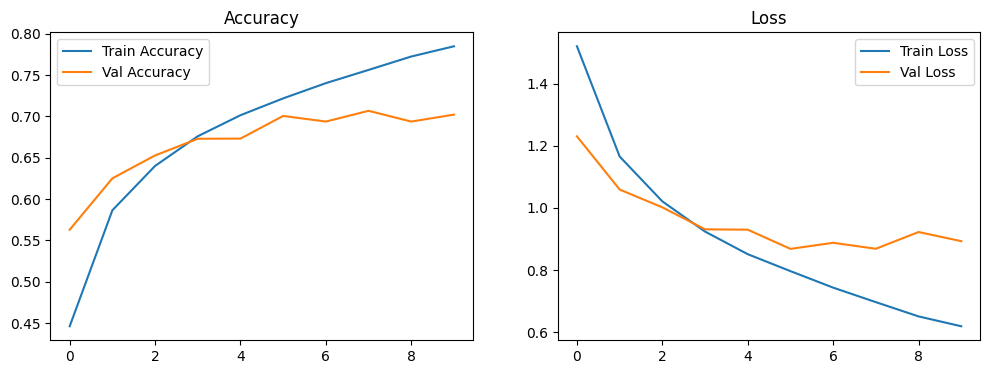

In [9]:

# 8. Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


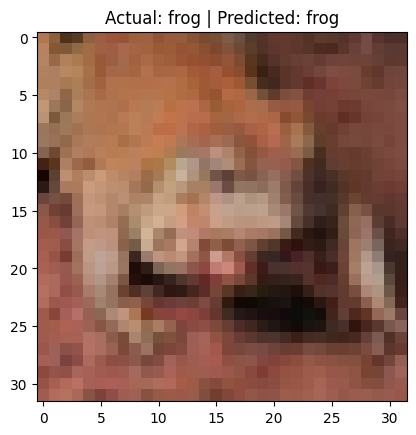

In [10]:


# 9. Prediction Example
import numpy as np
pred_index = 5
plt.imshow(x_test[pred_index])
plt.title(f"Actual: {class_names[y_test[pred_index]]} | Predicted: {class_names[np.argmax(model.predict(x_test[pred_index].reshape(1,32,32,3)))]}")
plt.show()